In [14]:
# Open csv from online, import it as Pandas dataframe
import pandas as pd
date = '09-06-2021'
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/' + date + '.csv'
print(url)
df = pd.read_csv(str(url))
print(df['Province_State'])
Province_State = df['Province_State']
# Texas is row 49

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/09-06-2021.csv
0                      Alabama
1                       Alaska
2               American Samoa
3                      Arizona
4                     Arkansas
5                   California
6                     Colorado
7                  Connecticut
8                     Delaware
9             Diamond Princess
10        District of Columbia
11                     Florida
12                     Georgia
13              Grand Princess
14                        Guam
15                      Hawaii
16                       Idaho
17                    Illinois
18                     Indiana
19                        Iowa
20                      Kansas
21                    Kentucky
22                   Louisiana
23                       Maine
24                    Maryland
25               Massachusetts
26                    Michigan
27                   Minnesota
28

In [9]:
# Take the input date, and turn it into a list
monthdaycount = [31,28,31,30,31,30,31,31,30,31,30,31]
leapmonthdaycount = [31,29,31,30,31,30,31,31,30,31,30,31]

# REMEMBER 2020 WAS A LEAP YEAR, IDIOT
# Start date is 4-12-2020
def dateCounter(date):
    dateCount = 0
    arrdate = [int(i) for i in date.split('-')]
    if arrdate[2]>2020:
        dateCount+=(arrdate[2]-2020)*366
        # 366 at least have passed since 1-1-2020, so add that here, its a leap year
    for i in range(arrdate[0]-1):
        dateCount+=monthdaycount[i]
    dateCount+=arrdate[1]
    return dateCount
# Curreny objective, get days since Jan 1st 2020
# DOESNT WORK WITH LEAP YEARS
def dateCounterReverse(dateCount):
    arrDate=[1,1,2020]
    activeMonths = []
    if dateCount>366:
        dateCount-=366
        arrDate[2]+=1
        # 366 at least have passed since 1-1-2020, so add that here, its a leap year
    if(arrDate[2]%4==0):
        activeMonths = leapmonthdaycount
        
    else:
        activeMonths = monthdaycount
    for i in range(len(activeMonths)-1):

        if(dateCount-activeMonths[arrDate[0]-1]>0):
            dateCount-=activeMonths[arrDate[0]-1]
            # print("the max day for month " + str(i) + " is " + str(activeMonths[arrDate[0]-1]))
            arrDate[0]+=1
        # Error here in month day counting, this was iterating through i, even when you couldn't subtract the given month's number of days, use the month number stored in the arrDate cause that's the current month
            # If the date can be subtracted from a given month, do so
    arrDate[1]+=dateCount-1
    for j in range(len(arrDate)):
        if len(str(arrDate[j-1]))<=1:
            arrDate[j-1] = '0'+ str(arrDate[j-1])
        else:
            arrDate[j-1] = str(arrDate[j-1])
    return arrDate
# Curreny objective Takes the number of days since a given event, and returns the date it occured
# DOESNT WORK WITH LEAP YEARS, OR FOR 2022,EXPIRES 1-1-2022


In [10]:
import matplotlib as plt
print(dateCounter('4-12-2020'))
# print the start date
texasCases = []
for i in range(dateCounter(date)-102):
    dateArr=dateCounterReverse(i+103)
    dateStr = str(dateArr[0])+'-'+str(dateArr[1])+'-'+str(dateArr[2])
    print(dateStr)
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/' + dateStr + '.csv'
    df = pd.read_csv(str(url))  
    texasCases.append(df["Active"][49])
# Construct a DF 
    # CURRENT ISSUE/TASK, ADD A ZERO TO THE BEGGINING OF THE ONE DIGIT INTEGERS IN THE ARRAY
# 

102
04-12-2020
04-13-2020
04-14-2020
04-15-2020
04-16-2020
04-17-2020
04-18-2020
04-19-2020
04-20-2020
04-21-2020
04-22-2020
04-23-2020
04-24-2020
04-25-2020
04-26-2020
04-27-2020
04-28-2020
04-29-2020
04-30-2020
05-01-2020
05-02-2020
05-03-2020
05-04-2020
05-05-2020
05-06-2020
05-07-2020
05-08-2020
05-09-2020
05-10-2020
05-11-2020
05-12-2020
05-13-2020
05-14-2020
05-15-2020
05-16-2020
05-17-2020
05-18-2020
05-19-2020
05-20-2020
05-21-2020
05-22-2020
05-23-2020
05-24-2020
05-25-2020
05-26-2020
05-27-2020
05-28-2020
05-29-2020
05-30-2020
05-31-2020
06-01-2020
06-02-2020
06-03-2020
06-04-2020
06-05-2020
06-06-2020
06-07-2020
06-08-2020
06-09-2020
06-10-2020
06-11-2020
06-12-2020
06-13-2020
06-14-2020
06-15-2020
06-16-2020
06-17-2020
06-18-2020
06-19-2020
06-20-2020
06-21-2020
06-22-2020
06-23-2020
06-24-2020
06-25-2020
06-26-2020
06-27-2020
06-28-2020
06-29-2020
06-30-2020
07-01-2020
07-02-2020
07-03-2020
07-04-2020
07-05-2020
07-06-2020
07-07-2020
07-08-2020
07-09-2020
07-10-2020
07-11-

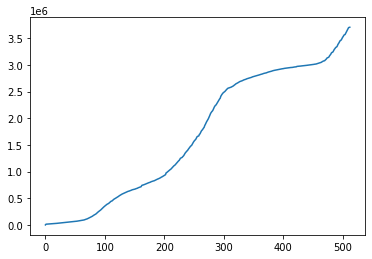

In [12]:
import matplotlib.pyplot as ply
ply.plot(texasCases)